# Cars features and price dataset

This is an analysis of the Car features and price dataset from Kaggle. My aims for the dataset are the following
- Clean the dataset 
- Conduct Univariate and Bivariate analysis to understand what factors have an effect on pricing and fuel economy
- Use Machine Learning algorithms to find
    - Predictive features for Fuel Economy
    - Regression model to predict MSRP

## Import the necessary libraries and data file and perform initial data assessment 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
# Pretty display for notebooks
%matplotlib inline
import visuals as vs


# Load the Census dataset
data = pd.read_csv("data.csv")



In [2]:

#create a profile report 
data.profile_report(style={'full_width':True})

<br>

__I really like using the profiling function, because it gives a lot of information in one like of code, and can help with the data wrangling and univariate analysis__ 

Based on the report we can see
- We have missing values in the dataset
- We have duplicated values 
- Highway MPG and City MPG are highly correlated 

Based on this information, we can begin the data wrangling process

## Data Wrangling

In this step I will clean up the data
1. Deal with the null values
2. Deal with the outliers

In [3]:
#Check if the dataset has any null values
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [4]:
#Check if there is anything specific that stands out about the null values in the Market Category
data[data['Market_Category'].isnull()]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
94,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
203,Chrysler,300,2015,regular unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,37570
204,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Sedan,31,19,1013,31695
205,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Sedan,31,19,1013,38070
206,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,44895


From the table above it seems that there is noting specific about the Nan's in the Market Category Column. Since, market category is not an independent characteristic (depends on other factors, like the make, model, style etc). Therefore, for downstream analysis, we can drop this column. 

In [5]:
#drop the market category column
data = data.drop(['Market_Category'], axis=1)
data.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine_Fuel_Type      3
Engine_HP            69
Engine_Cylinders     30
Transmission_Type     0
Driven_Wheels         0
Number_of_Doors       6
Vehicle_Size          0
Vehicle_Style         0
highway_MPG           0
city_mpg              0
Popularity            0
MSRP                  0
dtype: int64

### Null Values

The two major sources of null values are horsepower and engine cylinders. We will look at both of them and see if we can add the missing values to these or would we have to drop them

#### Horsepower

In [6]:
#Create a dataframe to further investigate the null values of Engine HP
df_temp = data[data['Engine_HP'].isnull()]

In [7]:
df_temp

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,62915
2907,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,53915
2908,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,64915
4203,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,30,23,5657,29100
4204,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,28,22,5657,30850
4205,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,28,22,5657,26850


__There are some specific models of cars that are missing horsepower values. Let's check which models are these__

In [8]:
df_temp['Model'].unique()

array(['500e', 'Continental', 'Escape', 'Fit EV', 'Focus', 'Freestar',
       'i-MiEV', 'Impala', 'Leaf', 'M-Class', 'MKZ', 'Model S', 'RAV4 EV',
       'Soul EV'], dtype=object)

__One maybe tempted to drop these values, but with a little help from Google, we can find the missing horsepower values and add them to the dataframe__

In [9]:
#First make a new copy of the dataframe to work with
df = data.copy()

In [10]:
#Here we add values of missing horsepower
result = [] 
for i in df['Model']:
    if i == '500e': 
        result.append(111) 
    elif i == 'Continental': 
        result.append(400) 
    elif i == 'Escape': 
        result.append(168)
    elif i == 'Fit EV': 
        result.append(123)
    elif i == 'Focus': 
        result.append(143)
    elif i == 'Freestar': 
        result.append(201) 
    elif i == 'i-MiEV': 
        result.append(66)
    elif i == 'Impala': 
        result.append(305)
    elif i == 'Leaf': 
        result.append(107)
    elif i == 'M-Class': 
        result.append(201)
    elif i == 'MKZ': 
        result.append(245) 
    elif i == 'Model S': 
        result.append(600)
    elif i == 'RAV4 EV': 
        result.append(154)
    elif i == 'Soul EV': 
        result.append(109)
    else:
        result.append(" ")
df["Result"] = result



In [11]:
#Here I will replace the missing values with a blank space, so it will be easy to melt the two columns
df["Engine_HP"] = df["Engine_HP"].fillna('')

In [12]:
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP,Result
0,BMW,1 Series M,2011,premium unleaded (required),335,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,
1,BMW,1 Series,2011,premium unleaded (required),300,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,
2,BMW,1 Series,2011,premium unleaded (required),300,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,
3,BMW,1 Series,2011,premium unleaded (required),230,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,
4,BMW,1 Series,2011,premium unleaded (required),230,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,


__Next, we will merge the new and the old horsepower columns to make a single column__

In [13]:
convert_dict = {'Result': str, 'Engine_HP': str}  
df = df.astype(convert_dict) 

In [14]:
df['Final_HP'] = df["Engine_HP"] + df["Result"]

In [15]:
df['Final_HP'] = df['Final_HP'].astype(float)

In [16]:
#Drop the old HP column
df = df.drop(columns=['Engine_HP', 'Result']) 

In [17]:
#Recheck null values
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine_Fuel_Type      3
Engine_Cylinders     30
Transmission_Type     0
Driven_Wheels         0
Number_of_Doors       6
Vehicle_Size          0
Vehicle_Style         0
highway_MPG           0
city_mpg              0
Popularity            0
MSRP                  0
Final_HP              0
dtype: int64

#### Engine Cylinders

In [18]:
#Make a temp dataframe to explore the missing values in the engine cylinders
df_temp = df[df['Engine_Cylinders'].isnull()]

In [19]:
df_temp

,Make,Model,Year,Engine_Fuel_Type,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP,Final_HP
1983,Chevrolet,Bolt EV,2017,electric,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905,200.0000
1984,Chevrolet,Bolt EV,2017,electric,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620,200.0000
3716,Volkswagen,e-Golf,2015,electric,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,33450,115.0000
3717,Volkswagen,e-Golf,2015,electric,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35445,115.0000
3718,Volkswagen,e-Golf,2016,electric,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,28995,115.0000
3719,Volkswagen,e-Golf,2016,electric,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35595,115.0000
5778,Mitsubishi,i-MiEV,2014,electric,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995,66.0000
5779,Mitsubishi,i-MiEV,2016,electric,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995,66.0660
5780,Mitsubishi,i-MiEV,2017,electric,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,102,121,436,22995,66.0660
8373,Toyota,RAV4 EV,2012,electric,NaN,DIRECT_DRIVE,front wheel drive,4.0,Midsize,4dr SUV,74,78,2031,49800,154.0154


__These cars are either electric or Mazdas with a rotary engine. In either case, they did not have any cylinders, so we can safely replace the NaN with 0.__

In [20]:
#Replace NaN with 0 in the Engine Cylinders Column
df['Engine_Cylinders'].fillna(0, inplace = True);

In [21]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     3
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      6
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_mpg             0
Popularity           0
MSRP                 0
Final_HP             0
dtype: int64

#### Engine Fuel

In [22]:
df_temp = df[df['Engine_Fuel_Type'].isnull()]

In [23]:
df_temp

,Make,Model,Year,Engine_Fuel_Type,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP,Final_HP
11321,Suzuki,Verona,2004,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199,155.0
11322,Suzuki,Verona,2004,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199,155.0
11323,Suzuki,Verona,2004,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499,155.0


In [24]:
#Replace NaN with regular unleaded in the Engine Fuel Type Column
df['Engine_Fuel_Type'].fillna('regular unleaded', inplace = True);

#### Number of doors

In [25]:
df_temp = df[df['Number_of_Doors'].isnull()]

In [26]:
df_temp

,Make,Model,Year,Engine_Fuel_Type,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP,Final_HP
4666,Ferrari,FF,2013,premium unleaded (required),12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000,651.0
6930,Tesla,Model S,2016,electric,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500,600.0
6931,Tesla,Model S,2016,electric,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,101,98,1391,66000,600.0
6932,Tesla,Model S,2016,electric,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,92,1391,134500,600.0
6933,Tesla,Model S,2016,electric,0.0,DIRECT_DRIVE,rear wheel drive,NaN,Large,Sedan,100,97,1391,74500,600.0
6934,Tesla,Model S,2016,electric,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,107,101,1391,71000,600.0


__In this case we see that there are two car models that don't have the number of doors. For all the Teslas we will have 4 doors, while the ferrari has 2 doors. First I will change the NaN to 4, and then deal with the ferrari later if needed.__

In [27]:
#Replace NaN with 4 in the Number of doors Column
df['Number_of_Doors'].fillna(4, inplace = True);

In [28]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_mpg             0
Popularity           0
MSRP                 0
Final_HP             0
dtype: int64

__As we can see above, we have taken care of the null values__

__Next up, we will look at duplicated values__

### Duplicated Values

In [29]:
dup_rows = df[df.duplicated()]

In [30]:
dup_rows.head(20)

,Make,Model,Year,Engine_Fuel_Type,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP,Final_HP
14,BMW,1 Series,2013,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,19,3916,31500,230.0
18,Audi,100,1992,regular unleaded,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,172.0
20,Audi,100,1992,regular unleaded,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,172.0
24,Audi,100,1993,regular unleaded,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,172.0
25,Audi,100,1993,regular unleaded,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,172.0
88,Nissan,200SX,1996,regular unleaded,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,36,26,2009,2000,115.0
92,Nissan,200SX,1997,regular unleaded,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,35,25,2009,2000,115.0
94,Nissan,200SX,1998,regular unleaded,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,35,25,2009,2000,115.0
109,Volvo,240,1992,regular unleaded,4.0,MANUAL,rear wheel drive,4.0,Midsize,Sedan,26,19,870,2000,114.0
126,BMW,3 Series Gran Turismo,2015,premium unleaded (required),4.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,33,22,3916,41850,240.0


__We see that there are duplicated values, but it just could be multiple cars with the same attributes, and therefore, I will not drop them__

### Data exploration for outliers

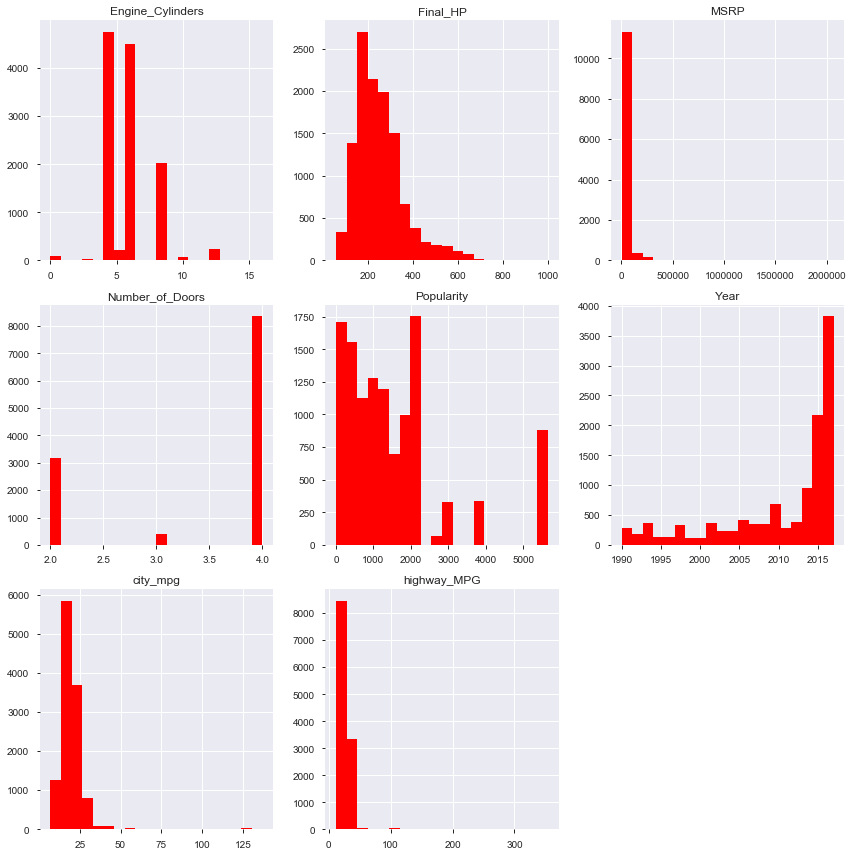

In [31]:
df.hist(bins = 20,grid=True, figsize = (12,12), color = 'red');
plt.tight_layout()

__Observations__

- There are some outliers in the price. Even though it is true that there are cars that are USD 2M, they will completely skew the distribution, so we will drop any car >500K

- We will also limit highway MPG to 130.

#### Limit the values of price and highway MPG

In [32]:
df_clean = df.copy()

In [33]:
df_clean['MSRP'] = df_clean['MSRP'].clip(upper = 500000)

In [34]:
df_clean['highway_MPG'] = df_clean['highway_MPG'].clip(upper = 130)

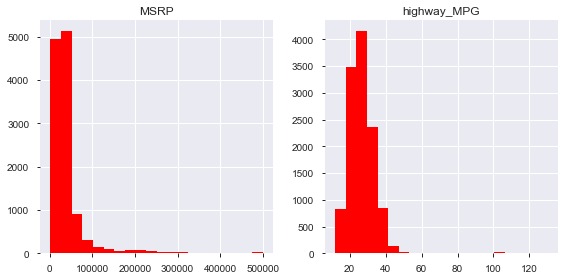

In [35]:
df_clean.hist(column = ['highway_MPG','MSRP'],bins = 20,grid=True, figsize = (8,4), color = 'red');
plt.tight_layout()

__We can see that the data is still right skewed, and we will log transform this before applying ML algorithms__

__Now that we have cleaned up the data, we will generate a profile report__

## Univariate Data Exploration

In [36]:
#We will write a function that we can use for univariate exploration
#Variable is the column name 
#x and y are length and width of the plot
def univar(variable, x, y):
    plt.figure(figsize=[x, y])
    sns.countplot(data = df_clean, x= variable,order = df_clean[variable].value_counts().index, palette="Blues_r")
    plt.xticks(rotation=90);


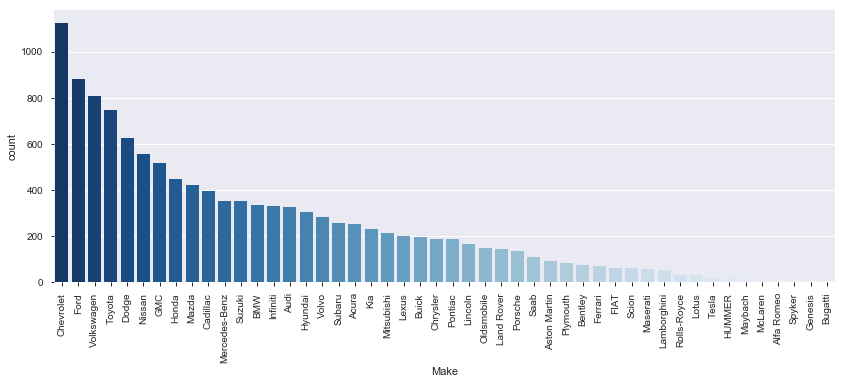

In [37]:
#Make of the car
univar('Make', 14, 5)

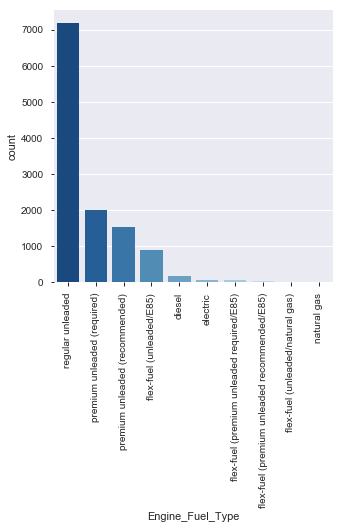

In [38]:
#Engine fuel type
univar('Engine_Fuel_Type', 5, 5)


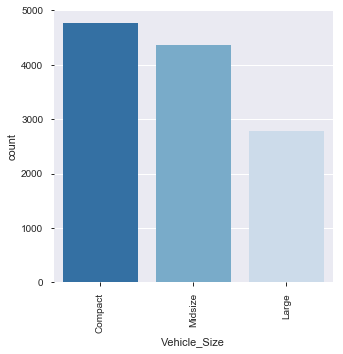

In [39]:
#Vehicle Size
univar('Vehicle_Size', 5, 5)

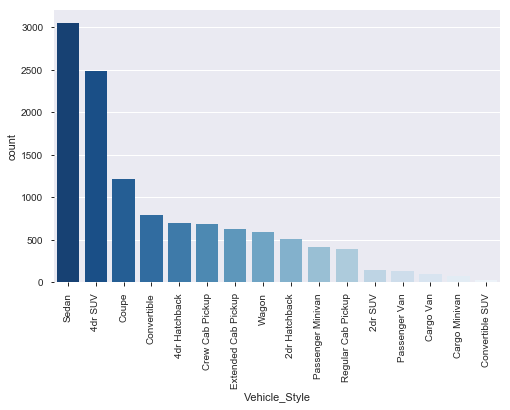

In [40]:
#Vehicle Style
univar('Vehicle_Style',8,5)

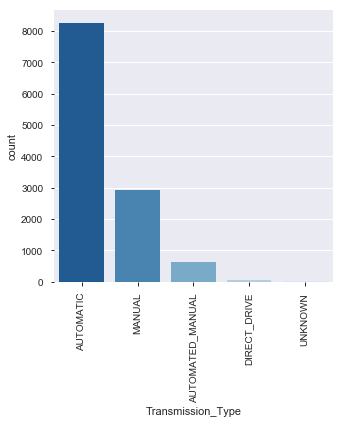

In [41]:
#Transmission
univar('Transmission_Type',5,5)

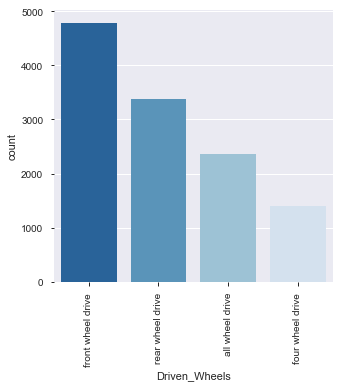

In [42]:
#Drive wheels
univar('Driven_Wheels',5,5)

### Univariate Data Exploration Summary

__Most common categories__
- Brand: Chevy
- Fuel: Regular unleaded
- Type: Sedan
- Transmission: Automatic 
- Drive: Front Wheel Drive

## Bivariate Data Exploration

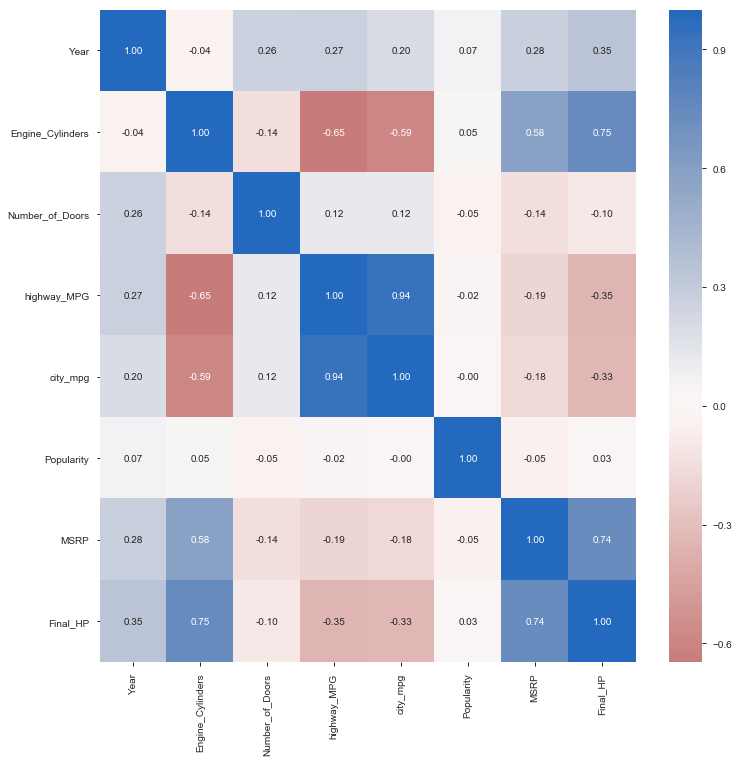

In [43]:
# correlation plot
plt.figure(figsize = [12,12])
sns.heatmap(df_clean.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

### MSRP

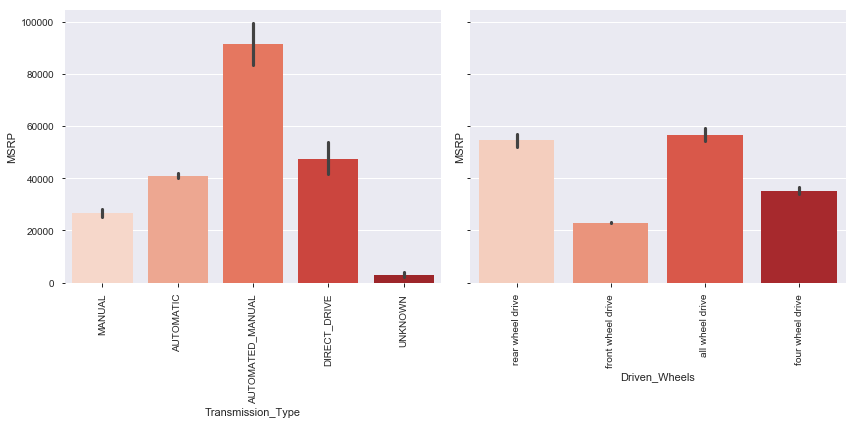

In [44]:
#MSRP vs Transmission and Wheels driven
fig, axarr = plt.subplots(1, 2, figsize=(12, 6), sharey = True)

sns.barplot(x = 'Transmission_Type', y = 'MSRP', data = df_clean,palette="Reds", ax=axarr[0]);
sns.barplot(x = 'Driven_Wheels', y = 'MSRP', data = df_clean,palette="Reds", ax=axarr[1]);
plt.sca(axarr[0])
plt.xticks(rotation=90)
plt.sca(axarr[1])
plt.xticks(rotation=90)
plt.tight_layout()

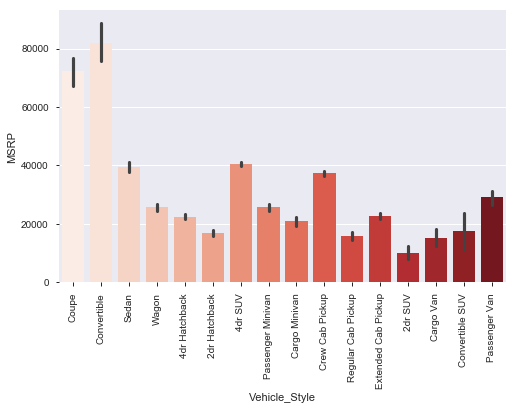

In [45]:
#Let's check the effect of vehicle size on the MSRP
plt.figure(figsize=[8, 5])
sns.barplot(x = 'Vehicle_Style', y = 'MSRP', data = df_clean,palette="Reds");
plt.xticks(rotation=90);


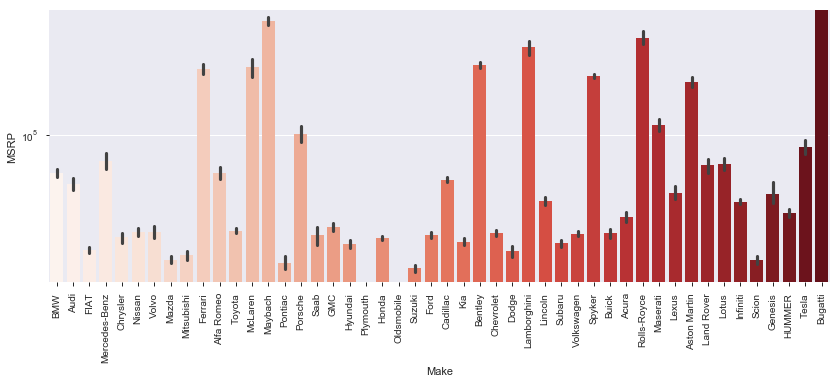

In [46]:
#Car Make vs MSRP
plt.figure(figsize=[14, 5])
sns.barplot(x = 'Make', y = 'MSRP', data = df_clean,palette="Reds");
plt.yscale('symlog')
plt.ylim(15000,500000)
plt.xticks(rotation=90);


### Highway MPG

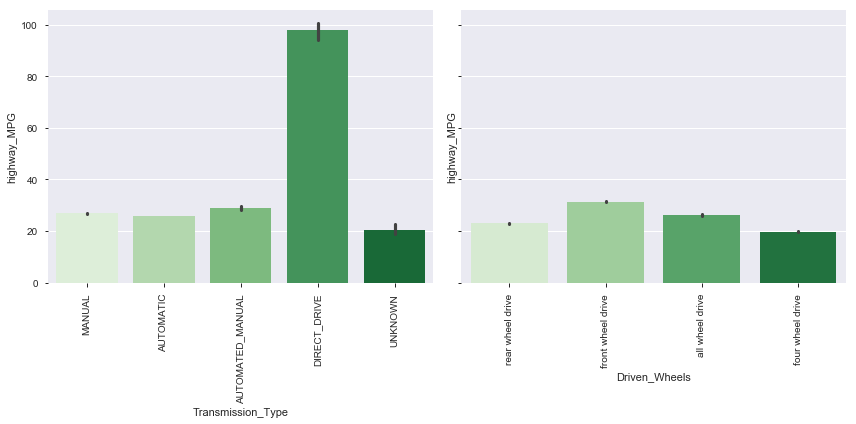

In [47]:
#MSRP vs Transmission and Wheels driven
fig, axarr = plt.subplots(1, 2, figsize=(12, 6), sharey = True)

sns.barplot(x = 'Transmission_Type', y = 'highway_MPG', data = df_clean,palette="Greens", ax=axarr[0]);
sns.barplot(x = 'Driven_Wheels', y = 'highway_MPG', data = df_clean,palette="Greens", ax=axarr[1]);
plt.sca(axarr[0])
plt.xticks(rotation=90)
plt.sca(axarr[1])
plt.xticks(rotation=90)
plt.tight_layout()

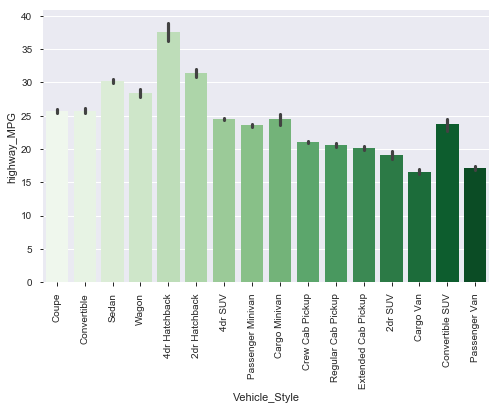

In [48]:
#Let's check the effect of vehicle size on the Mileage
plt.figure(figsize=[8, 5])
sns.barplot(x = 'Vehicle_Style', y = 'highway_MPG', data = df_clean,palette="Greens");
plt.xticks(rotation=90);


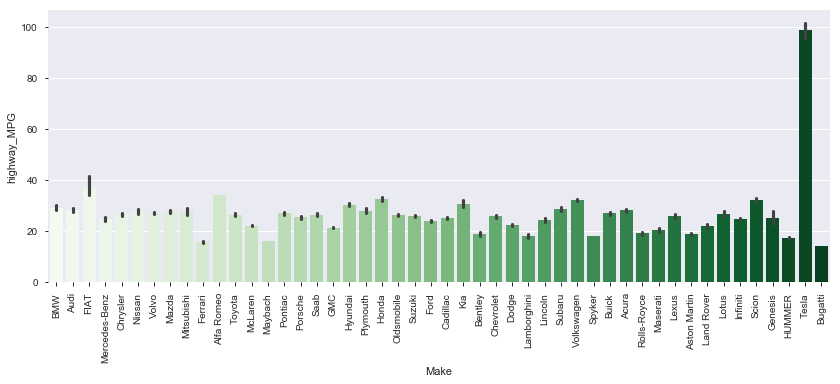

In [49]:
#Car Make vs MPG
plt.figure(figsize=[14, 5])
sns.barplot(x = 'Make', y = 'highway_MPG', data = df_clean,palette="Greens");
#plt.ylim(15000,500000)
plt.xticks(rotation=90);


### Bivariate Data Exploration Summary

__MSRP__

- Automated Manuals are most expensive (these are mostly exotic supercars)
- FWD are cheapest
- Coupes and Convertibles are most expensive
- There are three tiers based on brands
    - Tier 1 consists of ultra premium cars are Buggati, Maybach, Ferrari, etc
    - The second tier is BMW, Audi, Mercedes, Infiniti etc
    - Most mass market cars like Ford, Chevy form the third tier
    
__MPG__

- Direct drive has highest MPG (these electric cars)
- FWD cars have better MPG than rear wheel or AWD (these are more mass market cars, with less perfomance)
- 4DR Hatchbacks have best MPG (most electric cars fall in this category)
- Tesla as a brand has the best MPG (They only make electric cars)

## Multivariate Exploration

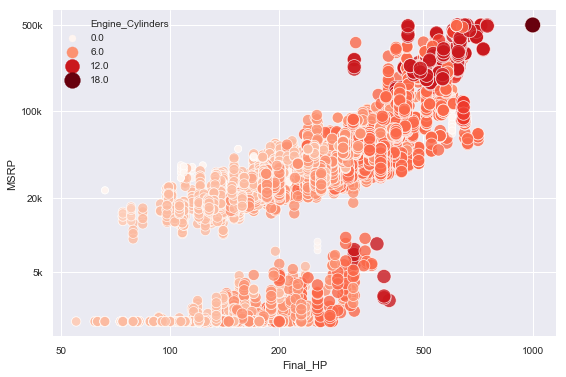

In [50]:
#Let's first look at the MSRP vs Horsepower
plt.figure(figsize=[9, 6])
sns.set_style("darkgrid")
sns.scatterplot(data = df_clean, x = 'Final_HP', y = 'MSRP', hue = 'Engine_Cylinders',sizes=(50, 250),size = 'Engine_Cylinders',alpha = 0.8, palette="Reds");

#Rescale the plot to better visualize the distribution
plt.xscale('log')
plt.xticks([50, 100, 200, 500, 1000], [50, 100, 200, 500, 1000])
plt.yscale('log')
plt.yticks([ 5000,20000, 100000,  500000], [ '5k' ,'20k',  '100k', '500k']);


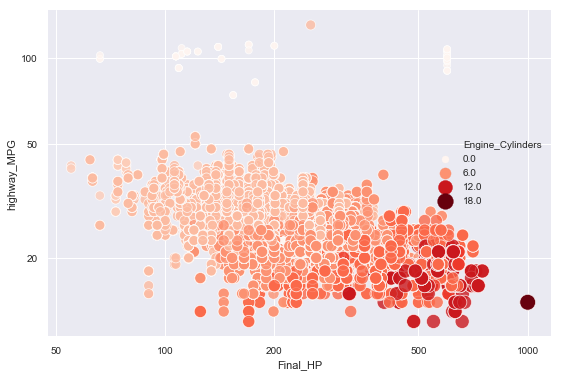

In [51]:
plt.figure(figsize=[9, 6])
sns.set_style("darkgrid")
sns.scatterplot(data = df_clean, x = 'Final_HP', y = 'highway_MPG', hue = 'Engine_Cylinders',sizes=(50, 250),size = 'Engine_Cylinders',alpha = 0.8, palette="Reds");
plt.xscale('log')
plt.xticks([50, 100, 200, 500, 1000], [50, 100, 200, 500, 1000])
plt.yscale('log')
plt.yticks([20, 50, 100], [ 20, 50, 100]);

## Building a classifcation model for Fuel Economy

In [83]:
df_class = df_clean.copy()

### Transform and scale the dataset

In [84]:
# Split the data into features and target label
mileage_raw = df_class[['highway_MPG']]
# in the features dataset, we will drop the highway_MPG, because that is the target
# We will also drop city_mpg because that is highly correlated to highway_MPG, 
# and Engine_Cylinders, which are highly correlated to Horsepower
features_raw = df_class.drop(['highway_MPG','city_mpg','Engine_Cylinders'], axis = 1)

In [85]:
# Log-transform the skewed features
skewed = ['MSRP', 'Final_HP']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

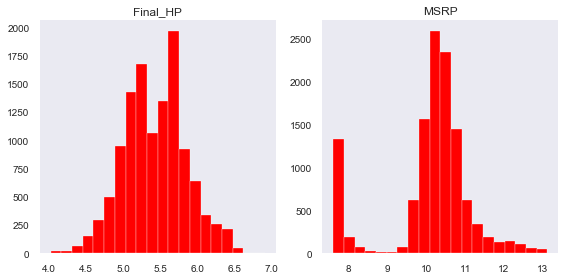

In [86]:
features_log_transformed.hist(column = ['Final_HP','MSRP'],bins = 20,grid=False, figsize = (8,4), color = 'red');
plt.tight_layout()

In [88]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Year', 'Number_of_Doors', 'Final_HP']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 10))

,Make,Model,Year,Engine_Fuel_Type,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,Popularity,MSRP,Final_HP
0,BMW,1 Series M,0.777778,premium unleaded (required),MANUAL,rear wheel drive,0.0,Compact,Coupe,3916,10.739349,0.621189
1,BMW,1 Series,0.777778,premium unleaded (required),MANUAL,rear wheel drive,0.0,Compact,Convertible,3916,10.612779,0.583053
2,BMW,1 Series,0.777778,premium unleaded (required),MANUAL,rear wheel drive,0.0,Compact,Coupe,3916,10.500977,0.583053
3,BMW,1 Series,0.777778,premium unleaded (required),MANUAL,rear wheel drive,0.0,Compact,Coupe,3916,10.290483,0.491286
4,BMW,1 Series,0.777778,premium unleaded (required),MANUAL,rear wheel drive,0.0,Compact,Convertible,3916,10.448744,0.491286
5,BMW,1 Series,0.814815,premium unleaded (required),MANUAL,rear wheel drive,0.0,Compact,Coupe,3916,10.348205,0.491286
6,BMW,1 Series,0.814815,premium unleaded (required),MANUAL,rear wheel drive,0.0,Compact,Convertible,3916,10.694238,0.583053
7,BMW,1 Series,0.814815,premium unleaded (required),MANUAL,rear wheel drive,0.0,Compact,Coupe,3916,10.579005,0.583053
8,BMW,1 Series,0.814815,premium unleaded (required),MANUAL,rear wheel drive,0.0,Compact,Convertible,3916,10.515994,0.491286
9,BMW,1 Series,0.851852,premium unleaded (required),MANUAL,rear wheel drive,0.0,Compact,Convertible,3916,10.524091,0.491286


In [89]:
mileage_raw.head()

,highway_MPG
0,26
1,28
2,28
3,28
4,28


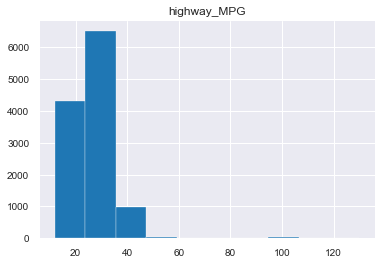

In [90]:
mileage_raw.hist();

In [91]:
#We will split the mileage (MPG) into three categories
mileage_raw.loc[(mileage_raw['highway_MPG'] < 25), 'highway_MPG'] = 0
mileage_raw.loc[(mileage_raw['highway_MPG'] >= 25)&(mileage_raw['highway_MPG'] < 35), 'highway_MPG'] = 1
mileage_raw.loc[(mileage_raw['highway_MPG'] >= 35), 'highway_MPG'] = 2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e1d2e10>]],
      dtype=object)

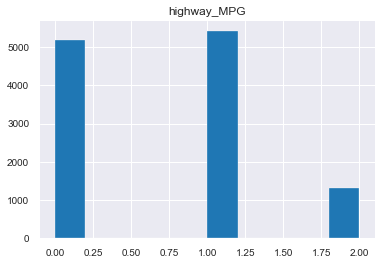

In [92]:
mileage_raw.hist()

In [93]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)


# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print (encoded)


1006 total features after one-hot encoding.
['Year', 'Number_of_Doors', 'Popularity', 'MSRP', 'Final_HP', 'Make_Acura', 'Make_Alfa Romeo', 'Make_Aston Martin', 'Make_Audi', 'Make_BMW', 'Make_Bentley', 'Make_Bugatti', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge', 'Make_FIAT', 'Make_Ferrari', 'Make_Ford', 'Make_GMC', 'Make_Genesis', 'Make_HUMMER', 'Make_Honda', 'Make_Hyundai', 'Make_Infiniti', 'Make_Kia', 'Make_Lamborghini', 'Make_Land Rover', 'Make_Lexus', 'Make_Lincoln', 'Make_Lotus', 'Make_Maserati', 'Make_Maybach', 'Make_Mazda', 'Make_McLaren', 'Make_Mercedes-Benz', 'Make_Mitsubishi', 'Make_Nissan', 'Make_Oldsmobile', 'Make_Plymouth', 'Make_Pontiac', 'Make_Porsche', 'Make_Rolls-Royce', 'Make_Saab', 'Make_Scion', 'Make_Spyker', 'Make_Subaru', 'Make_Suzuki', 'Make_Tesla', 'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo', 'Model_1 Series', 'Model_1 Series M', 'Model_100', 'Model_124 Spider', 'Model_190-Class', 'Model_2', 'Model_2 Series', 'Model_200', 'Mo

In [94]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    mileage_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 9531 samples.
Testing set has 2383 samples.


In [95]:
#import necessary ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  make_scorer, confusion_matrix, fbeta_score

In [96]:
#Pick three classifiers 
clf_A = LogisticRegression(random_state = 0)
clf_B = GradientBoostingClassifier(random_state = 0)
clf_C = RandomForestClassifier(random_state = 0)

#Fit the data to the three classifiers and print results from them
for clf in [clf_A, clf_B, clf_C]:
    learner = clf
    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get start time
    train_time = end-start


    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)

    # Score our model
    print(clf.__class__.__name__)                                                                                                                      
    print('Accuracy score: ', format(accuracy_score(y_test, predictions_test)))
    print('Precision score: ', format(precision_score(y_test, predictions_test,average='weighted')))
    print('Recall score: ', format(recall_score(y_test, predictions_test,average='weighted')))
    print('F1 score: ', format(f1_score(y_test, predictions_test,average='weighted')))
    print('Time: ', format(train_time))
    
    print('Confusion Matrix')
    print(confusion_matrix(y_test,predictions_test))
    print( )

LogisticRegression
Accuracy score:  0.9148132605958875
Precision score:  0.9145730678269199
Recall score:  0.9148132605958875
F1 score:  0.9144162757920861
Time:  0.36118006706237793
Confusion Matrix
[[ 969   60    0]
 [  64 1007   27]
 [   0   52  204]]

GradientBoostingClassifier
Accuracy score:  0.9093579521611415
Precision score:  0.9103244617115024
Recall score:  0.9093579521611415
F1 score:  0.9092466847423099
Time:  41.488425970077515
Confusion Matrix
[[ 941   88    0]
 [  54 1019   25]
 [   1   48  207]]

RandomForestClassifier
Accuracy score:  0.9618128409567772
Precision score:  0.9617751299666105
Recall score:  0.9618128409567772
F1 score:  0.9617689108879187
Time:  0.35206103324890137
Confusion Matrix
[[1005   24    0]
 [  36 1048   14]
 [   0   17  239]]



In [127]:
from sklearn.model_selection import GridSearchCV

#Do a GridSearch to optimize the best model from the previous step 

# build a classifier
clf_rf = RandomForestClassifier(random_state = 0)

# Set up the hyperparameter search
parameters = {"n_estimators": [10,50,100] ,"max_depth": [5,50,250], "min_samples_split": [2, 5, 10,15], "min_samples_leaf": [2, 4,8,12],"criterion": ["gini"]}

# Run a randomized search over the hyperparameters
random_search = GridSearchCV(clf_rf, parameters)

# Fit the model on the training data
grid_fit = random_search.fit(X_train, y_train)

#Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions on the test data
#rf_preds = random_search.best_estimator_.predict(X_test)
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions, average='weighted')))
print('Recall score: ', format(recall_score(y_test, predictions, average='weighted')))
print('F1 score: ', format(f1_score(y_test, predictions,average='weighted')))
print('\n\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))

Accuracy score:  0.9618128409567772
Precision score:  0.9617751299666105
Recall score:  0.9618128409567772
F1 score:  0.9617689108879187



Confusion Matrix
[[1005   24    0]
 [  36 1048   14]
 [   0   17  239]]


In [128]:
#Make a function to show the top features
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:8]]
    values = importances[indices][:8]

    # Creat the plot
    fig = plt.figure(figsize = (12,7))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(8), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(8) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(8), columns)
    plt.xlim((-0.5, 7.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    plt.xticks(rotation=45);
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

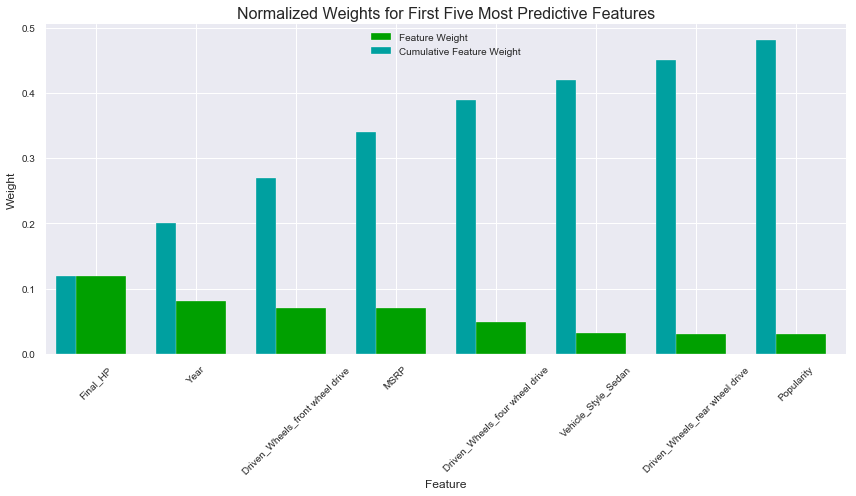

In [129]:
# Import a supervised learning model that has 'feature_importances_'
###Importing a new model is not necessary as the GradientBoostingClassifier already has feature_importance_ attribute 

# Train the supervised model on the training set using .fit(X_train, y_train)
model = best_clf

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

__We see that the Final_HP is the top predictive feature. This is similar to what we found in our previous bivariate analysis, where we saw that HP and MPG were inversely related__